In [0]:
import pandas as pd
import numpy as np

In [0]:
df = pd.read_csv('./drive/My Drive/data/esc-50/meta/esc50.csv')

In [0]:
df.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


(128, 216)

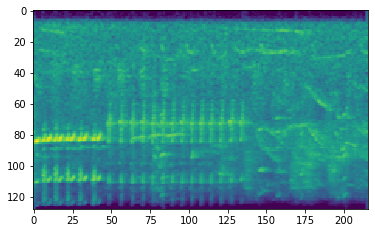

In [0]:
import librosa
import skimage.transform as st
import matplotlib.pyplot as plt

fname = './drive/My Drive/data/esc-50/audio/' + df['filename'][1]
audio, sample_rate = librosa.load(fname, res_type='kaiser_fast')
ms = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
ms_db = librosa.power_to_db(ms, ref=np.max)
#ms_db = st.resize(ms_db, (40,50))
plt.imshow(ms_db, interpolation='nearest');
ms_db.shape

In [0]:
x_spec = np.zeros(shape=(df.shape[0], 128 * 216))
x_spec_mean = np.zeros(shape=(df.shape[0], 128))
x_fmcc = np.zeros(shape=(df.shape[0], 40 * 216))
x_fmcc_mean = np.zeros(shape=(df.shape[0], 40))
x_fmcc_img = np.zeros(shape=(df.shape[0], 40, 216))

In [0]:
for i in range(df.shape[0]):
    fname = './drive/My Drive/data/esc-50/audio/' + df['filename'][i]
    audio, sample_rate = librosa.load(fname, res_type='kaiser_fast')
    ms = librosa.feature.melspectrogram(y=audio, sr=sample_rate)
    ms_db = librosa.power_to_db(ms, ref=np.max)
    ms_mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    
    #x_spec[i] = np.resize(ms_db, (1, 128*216))
    #x_spec_mean[i] = np.mean(ms_db, axis=1)
    #x_fmcc[i] = np.resize(ms_mfcc, (1, 40*216))
    #x_fmcc_mean[i] = np.mean(ms_mfcc, axis=1)
    x_fmcc_img[i] = ms_mfcc
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
import joblib

#joblib.dump(x_spec, 'x_spec.pkl')
#joblib.dump(x_spec_mean, 'x_spec_mean.pkl')
#joblib.dump(x_fmcc, 'x_mfcc.pkl')
#joblib.dump(x_fmcc_mean, 'x_mfcc_mean.pkl')
joblib.dump(x_fmcc_img, 'x_mfcc_img.pkl')

['x_mfcc_img.pkl']

In [0]:
x_fmcc_feat = np.zeros(shape=(df.shape[0], 3))

for i in range(2000):
  x_fmcc_feat[i, 0] = np.min(x_fmcc_img[i,:,:])
  x_fmcc_feat[i, 1] = np.mean(x_fmcc_img[i,:,:])
  x_fmcc_feat[i, 2] = np.max(x_fmcc_img[i,:,:])
  



In [0]:
joblib.dump(x_fmcc_feat, 'x_mfcc_feat.pkl')

['x_mfcc_feat.pkl']

In [0]:
y = df['category']

In [0]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test, y_train, y_test = train_test_split(x_spec, x_spec_mean, x_fmcc, x_fmcc_mean, y, test_size = 0.2)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier()
rf1.fit(X1_train, y_train)
rf1.score(X1_test, y_test)

In [0]:
rf2 = RandomForestClassifier()
rf2.fit(X2_train, y_train)
rf2.score(X2_test, y_test)

In [0]:
rf3 = RandomForestClassifier()
rf3.fit(X3_train, y_train)
rf3.score(X3_test, y_test)

In [0]:
rf4 = RandomForestClassifier()
rf4.fit(X4_train, y_train)
rf4.score(X4_test, y_test)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

rf = RandomForestClassifier()
#rf.fit(X_train, y_train)
#rf.score(X_test, y_test)

In [0]:
import xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
xgb.score(X_test, y_test)

0.3825

In [0]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
lgbm.score(X_test, y_test)

0.4575

In [0]:
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle

x, y = shuffle(x, y)
cv_results = cross_validate(rf, x, y, cv=5)
np.mean(cv_results['test_score'])

0.49399999999999994

In [0]:
def treinar_modelo(params):
  max_depth = params[0]
  n_estimators = params[1]
  min_samples_split = params[2]
  min_samples_leaf = params[3]

  print(params, '\n')
    
  mdl = RandomForestClassifier(max_depth = max_depth,
                               n_estimators = n_estimators,
                               min_samples_split = min_samples_split,
                               min_samples_leaf = min_samples_leaf,
                               n_jobs=-1)
  mdl.fit(X_train,y_train)
    
  return -mdl.score(X_test,y_test)

In [0]:
!pip install scikit-optimize
from skopt import gp_minimize

In [0]:
x, y = shuffle(x, y)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [0]:
space = [(2, 110), # max_depth
         (2, 2000), # n_estimators
         (2, 10), # min_samples_split
         (1, 10)] # min_samples_leaf

In [0]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=100, n_random_starts=20)

Iteration No: 1 started. Evaluating function at random point.
[110, 1865, 3, 10] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 13.9228
Function value obtained: -0.3925
Current minimum: -0.3925
Iteration No: 2 started. Evaluating function at random point.
[27, 794, 5, 7] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.6808
Function value obtained: -0.4275
Current minimum: -0.4275
Iteration No: 3 started. Evaluating function at random point.
[103, 1693, 5, 6] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 14.8618
Function value obtained: -0.4275
Current minimum: -0.4275
Iteration No: 4 started. Evaluating function at random point.
[50, 461, 6, 9] 

Iteration No: 4 ended. Evaluation done at random point.
Time taken: 3.6607
Function value obtained: -0.4000
Current minimum: -0.4275
Iteration No: 5 started. Evaluating function at random point.
[51, 863, 10, 8] 

Iteration No: 5 ended. Evaluation done at random point.
Time

In [0]:
resultados_gp.fun

-0.5825

In [0]:
# RF
# [72, 1234, 2, 1] - 0.5775
# [70, 1732, 3, 1] - 0.575
# [88, 277, 2, 1] - 0.5825

In [0]:
def treinar_modelo_lgbm(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl = LGBMClassifier(learning_rate=learning_rate,
                         num_leaves=num_leaves,
                         min_child_samples=min_child_samples,
                         subsample=subsample,
                         colsample_bytree=colsample_bytree,
                         random_state=0,
                         subsample_freq=1,
                         n_estimators=100,
                         n_jobs=-1)
    mdl.fit(X_train,y_train)
    
    return -mdl.score(X_test, y_test)

In [0]:
space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

In [0]:
resultado_lgbm = gp_minimize(treinar_modelo_lgbm, space, random_state=1, verbose=1, n_calls=50, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 21.2482
Function value obtained: -0.5075
Current minimum: -0.5075
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 12.4196
Function value obtained: -0.3150
Current minimum: -0.5075
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 4.0805
Function value obtained: -0.2500
Current minimum: -0.5075
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time 

In [0]:
resultado_lgbm.x

[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785]

In [0]:
# lgbm
# [0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] - 0.5075

In [0]:
from sklearn.ensemble import VotingClassifier

rf = RandomForestClassifier(max_depth = 88,
                            n_estimators = 277,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            n_jobs=-1)

lgb = LGBMClassifier(learning_rate=0.09871192514273254,
                     num_leaves=120,
                     min_child_samples=14,
                     subsample=1,
                     colsample_bytree=0.3124800792567785,
                     subsample_freq=1,
                     n_estimators=100,
                     n_jobs=-1)

model = VotingClassifier(estimators=[('rf', rf), ('lgb', lgb)], voting='soft')
model = model.fit(X_train, y_train)
model.score(X_test, y_test)


0.51

In [0]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
clf = StackingClassifier(estimators=[('rf', rf), ('lgb', lgb)], final_estimator=LogisticRegression())
clf.fit(X_train, y_train).score(X_test, y_test)

0.4675

In [0]:
import skopt
from skopt import gp_minimize, forest_minimize
from skopt.space import Real, Integer, Categorical
from skopt.plots import plot_convergence
from skopt.utils import use_named_args
from skopt import dump, load




In [0]:
dim_boosting_type = Categorical(categories=['gbdt', 'dart', 'goss'], name='boosting_type')
dim_num_leaves = Integer(low=30, high=150, name='num_leaves')
dim_learning_rate = Real(low=1e-4, high=2e-1, prior='log-uniform', name='learning_rate')
dim_subsample_for_bin = Integer(low=20000, high=300000, name='subsample_for_bin')
dim_min_child_samples = Integer(low=20, high=500, name='min_child_samples')
dim_reg_alpha = Real(low=0, high=1, prior='uniform', name='reg_alpha')
dim_reg_lambda = Real(low=0, high=1, prior='uniform', name='reg_lambda')
dim_colsample_bytree = Real(low=0.6, high=1, prior='uniform', name='colsample_bytree')
dim_n_estimators = Integer(low=20, high=1000, name='n_estimators')


dimensions = [dim_boosting_type,
              dim_num_leaves,
              dim_learning_rate,
              dim_subsample_for_bin,
              dim_min_child_samples,
              dim_reg_alpha,
              dim_reg_lambda,
              dim_colsample_bytree,
              dim_n_estimators]

default_parameters = ['gbdt', 42, 1e-1, 180000, 40, 0.4, 0.5, 0.8, 200]

validation_data = [(X_test, y_test)]
@use_named_args(dimensions=dimensions)
def fitness(boosting_type, num_leaves, learning_rate, subsample_for_bin, min_child_samples, reg_alpha, reg_lambda, colsample_bytree, n_estimators):
  model = LGBMClassifier(boosting_type=boosting_type, num_leaves=num_leaves, learning_rate=learning_rate,
                         subsample_for_bin=subsample_for_bin, min_child_samples=min_child_samples, reg_alpha=reg_alpha,
                         reg_lambda=reg_lambda, colsample_bytree=colsample_bytree, n_estimators=n_estimators)
  

  score = model.fit(X_train, y_train, verbose=40).score(X_test, y_test)
        
  del model
    
  return -score

search_result = gp_minimize(func=fitness, dimensions=dimensions, n_calls=50, x0=default_parameters, verbose=1)

Iteration No: 1 started. Evaluating function at provided point.
Iteration No: 1 ended. Evaluation done at provided point.
Time taken: 10.1135
Function value obtained: -0.4450
Current minimum: -0.4450
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 27.8407
Function value obtained: -0.1000
Current minimum: -0.4450
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 22.5473
Function value obtained: -0.2400
Current minimum: -0.4450
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 24.0620
Function value obtained: -0.0725
Current minimum: -0.4450
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 54.6827
Function value obtained: -0.4625
Current minimum: -0.4625
Iteration No: 6 

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 69 ended. Search finished for the next optimal point.
Time taken: 27.4633
Function value obtained: -0.4975
Current minimum: -0.5250
Iteration No: 70 started. Searching for the next optimal point.
Iteration No: 70 ended. Search finished for the next optimal point.
Time taken: 42.3997
Function value obtained: -0.5100
Current minimum: -0.5250
Iteration No: 71 started. Searching for the next optimal point.
Iteration No: 71 ended. Search finished for the next optimal point.
Time taken: 41.7258
Function value obtained: -0.5150
Current minimum: -0.5250
Iteration No: 72 started. Searching for the next optimal point.
Iteration No: 72 ended. Search finished for the next optimal point.
Time taken: 42.1641
Function value obtained: -0.5025
Current minimum: -0.5250
Iteration No: 73 started. Searching for the next optimal point.
Iteration No: 73 ended. Search finished for the next optimal point.
Time taken: 37.4020
Function value obtained: -0.4950
Current minimum: -0.5250
Iteration No: 

KeyboardInterrupt: ignored

In [0]:
search_result.x